In [19]:
import os
import kagglehub
import zipfile
import shutil
import numpy as np
import torch

In [43]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [2]:
path = kagglehub.dataset_download("blanderbuss/midi-classic-music")

print("Path to dataset files:", path)

Path to dataset files: /Users/arr/.cache/kagglehub/datasets/blanderbuss/midi-classic-music/versions/1


In [3]:
# List all files and directories in the downloaded dataset path
print("Files and directories in dataset path:")
for item in os.listdir(path):
    print(item)

Files and directories in dataset path:
Tchaikovsky Lake Of The Swans Act 1 6mov.mid
Arndt
Rothchild Symphony Rmw12 2mov.mid
Tchaicovsky Waltz of the Flowers.MID
Tchaikovsky Lake Of The Swans Act 2 14mov.mid
Tchaikovsky Lake Of The Swans Act 1 4mov.mid
Albe╠üniz
Tchaikovsky Lake Of The Swans Act 2 10mov.mid
Tchaikovsky Lake Of The Swans Act 1 2mov.mid
midiclassics
Tchaikovsky Lake Of The Swans Act 2 12mov.mid
Alkan
Rothchlid Symphony Rmw12 3mov.mid
Tchaikovsky Lake Of The Swans Act 1 7-8movs.mid
Sibelius Kuolema Vals op44.mid
Wagner Ride of the valkyries.mid
Tchaikovsky Lake Of The Swans Act 1 5mov.mid
Tchaikovsky Lake Of The Swans Act 1 9mov.mid
Tchaikovsky Lake Of The Swans Act 1 1mov.mid
Arensky
Tchaikovsky Lake Of The Swans Act 2 11mov.mid
Tchaikovsky Lake Of The Swans Act 2 13mov.mid
Tchaikovsky Lake Of The Swans Act 1 3mov.mid
Ambroise
midiclassics.zip


In [4]:
# here, we'll list the directories we have in the manually downloaded dataset in 'data/NN_midi_files_extended/dev'
directories = [d for d in os.listdir('data/NN_midi_files_extended/dev') if os.path.isdir(os.path.join('data/NN_midi_files_extended/dev', d))]
print("Directories in 'data/NN_midi_files_extended/dev':")
for d in directories:
    print(d)

Directories in 'data/NN_midi_files_extended/dev':
mozart
chopin
handel
byrd
schumann
mendelssohn
hummel
bach
bartok


In [5]:
zip_path = os.path.join(path, 'midiclassics.zip')
extract_path = os.path.join('data', 'kaggle', 'midiclassics')
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Extracted files to:", extract_path)

Extracted files to: data/kaggle/midiclassics


In [6]:
print("Files and directories in extracted folder:")
for item in os.listdir(extract_path):
    print(item)

Files and directories in extracted folder:
Griffes
Mozart
Durand, E
Satie
Rothchild Piano Sonata Rmw13 2mov.mid
Liszt Bach Prelude Transcription.mid
Diabelli Sonatina op151 n1 2mov.mid
Liszt Paganini Etude n5.mid
Tchaikovsky Lake Of The Swans Act 1 6mov.mid
Arndt
Rothchild Symphony Rmw12 2mov.mid
Skriabin
Ginastera Estancia.mid
Bizet Carmen Prelude.mid
Rothchild Horn Concerto Rmw16 3mov.mid
Jakobowski
Chopin
Kuhlau Sonatina op55 n3 1mov.mid
Stravinski
Taube
Komzak
Lange
Mendelsonn
Tchaicovsky Waltz of the Flowers.MID
Reinecke Piano Concerto n3 1mov.mid
Katzwarra
Diabelli Sonatina op151 n2 1mov.mid
Vaughan
Diabelli Sonatina op151 n3 1mov.mid
Pachelbel
Coleridge-Taylor
Rossini
Czerny
Ravel
Buxethude Buxwv138 Prelude.mid
Finck
Durand, MA
Handel
Hiller
Rothchild Horn Concerto Rmw16 1mov.mid
Liszt Paganini Etude n3.mid
.DS_Store
Copland
Burgmuller
Liszt Paganini Etude n2.mid
Debussy Suite Bergamasque 2mov.mid
Tchaikovsky Lake Of The Swans Act 2 14mov.mid
MacBeth
Dvorak Symphony op70 n7 2mov

In [7]:
TARGET_COMPOSERS = [
    'Bach',
    'Beethoven',
    'Chopin',
    'Mozart',
]

In [8]:
# list files in extract_path that contain the target composers in name
for composer in TARGET_COMPOSERS:
    composer_files = [f for f in os.listdir(extract_path) if composer.lower() in f.lower()]
    print(f"Files for {composer}: {composer_files}")

Files for Bach: ['Liszt Bach Prelude Transcription.mid', 'midi_bach_flat', 'Bach', 'C.P.E.Bach Solfeggieto.mid']
Files for Beethoven: ['Beethoven', 'midi_beethoven_flat']
Files for Chopin: ['Chopin', 'midi_chopin_flat']
Files for Mozart: ['Mozart', 'midi_mozart_flat']


In [9]:
# Only keep directories that contain a target composer's name
for item in os.listdir(extract_path):
    item_path = os.path.join(extract_path, item)
    if not any(composer.lower() in item.lower() for composer in TARGET_COMPOSERS):
        if os.path.isfile(item_path):
            os.remove(item_path)
            print(f"Deleted file: {item_path}")
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)
            print(f"Deleted directory: {item_path}")

Deleted directory: data/kaggle/midiclassics/Griffes
Deleted directory: data/kaggle/midiclassics/Durand, E
Deleted directory: data/kaggle/midiclassics/Satie
Deleted file: data/kaggle/midiclassics/Rothchild Piano Sonata Rmw13 2mov.mid
Deleted file: data/kaggle/midiclassics/Diabelli Sonatina op151 n1 2mov.mid
Deleted file: data/kaggle/midiclassics/Liszt Paganini Etude n5.mid
Deleted file: data/kaggle/midiclassics/Tchaikovsky Lake Of The Swans Act 1 6mov.mid
Deleted directory: data/kaggle/midiclassics/Arndt
Deleted file: data/kaggle/midiclassics/Rothchild Symphony Rmw12 2mov.mid
Deleted directory: data/kaggle/midiclassics/Skriabin
Deleted file: data/kaggle/midiclassics/Ginastera Estancia.mid
Deleted file: data/kaggle/midiclassics/Bizet Carmen Prelude.mid
Deleted file: data/kaggle/midiclassics/Rothchild Horn Concerto Rmw16 3mov.mid
Deleted directory: data/kaggle/midiclassics/Jakobowski
Deleted file: data/kaggle/midiclassics/Kuhlau Sonatina op55 n3 1mov.mid
Deleted directory: data/kaggle/mid

In [10]:
# also delete "C.P.E.Bach" files. This was the son of J.S. Bach, and we want to keep only the main composers
for item in os.listdir(extract_path):
    if 'C.P.E.Bach' in item:
        item_path = os.path.join(extract_path, item)
        if os.path.isfile(item_path):
            os.remove(item_path)
            print(f"Deleted file: {item_path}")
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)
            print(f"Deleted directory: {item_path}")

Deleted file: data/kaggle/midiclassics/C.P.E.Bach Solfeggieto.mid


In [11]:
from music21 import midi, converter, instrument, note, chord
import matplotlib.pyplot as plt
import librosa.display

In [12]:
base_path = 'data/kaggle/midiclassics'
ave_maria_path = os.path.join(base_path, 'Bach', 'AveMaria.mid')

mf = midi.MidiFile()
mf.open(ave_maria_path)
mf.read()
mf.close()
s = midi.translate.midiFileToStream(mf)
s.show('midi')

In [13]:
midi_path = ave_maria_path
score = converter.parse(midi_path)

# Get metadata
print("Title:", score.metadata.title if score.metadata else "Unknown")
print("Composer:", score.metadata.composer if score.metadata else "Unknown")

for part in score.parts:
    instr = part.getInstrument()
    print("Instrument:", instr)

for element in score.recurse():
    if isinstance(element, note.Note):
        print(f"Note: {element.pitch}, Duration: {element.duration.quarterLength}")
    elif isinstance(element, chord.Chord):
        print(f"Chord: {element.pitches}, Duration: {element.duration.quarterLength}")

for el in score.recurse():
    if el.isClassOrSubclass('MetronomeMark'):
        print("Tempo:", el.number)
    if el.isClassOrSubclass('TimeSignature'):
        print("Time Signature:", el.ratioString)
    if el.isClassOrSubclass('KeySignature'):
        print("Key Signature:", el.sharps)

Title: None
Composer: None
Instrument: : 
Instrument: : 
Instrument: : 
Note: F3, Duration: 0.25
Note: A3, Duration: 0.25
Note: C4, Duration: 0.25
Note: F4, Duration: 0.25
Note: A4, Duration: 0.25
Note: C4, Duration: 0.25
Note: F4, Duration: 0.25
Note: A4, Duration: 0.25
Note: F3, Duration: 0.25
Note: A3, Duration: 0.25
Note: C4, Duration: 0.25
Note: F4, Duration: 0.25
Note: A4, Duration: 0.25
Note: C4, Duration: 0.25
Note: F4, Duration: 0.25
Note: A4, Duration: 0.25
Note: F3, Duration: 0.25
Note: G3, Duration: 0.25
Note: D4, Duration: 0.25
Note: G4, Duration: 0.25
Note: B-4, Duration: 0.25
Note: D4, Duration: 0.25
Note: G4, Duration: 0.25
Note: B-4, Duration: 0.25
Note: F3, Duration: 0.25
Note: G3, Duration: 0.25
Note: D4, Duration: 0.25
Note: G4, Duration: 0.25
Note: B-4, Duration: 0.25
Note: D4, Duration: 0.25
Note: G4, Duration: 0.25
Note: B-4, Duration: 0.25
Note: E3, Duration: 0.25
Note: G3, Duration: 0.25
Note: C4, Duration: 0.25
Note: G4, Duration: 0.25
Note: B-4, Duration: 0.2

/var/folders/hf/4xjln2lx2qjf5j4f0h6byy5h0000gn/T/ipykernel_79370/1175235068.py:19: Music21DeprecationWarning: ProtoM21Object.isClassOrSubclass was deprecated on v7 and will disappear at or after v10. use `someClass in .classSet`or for intersection: `not classSet.isdisjoint(classList)`
  if el.isClassOrSubclass('MetronomeMark'):


In [14]:
dir(score.metadata)

['_DOC_ATTR',
 '_DOC_ORDER',
 '__annotations__',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activeSite',
 '_activeSiteStoredOffset',
 '_add',
 '_cache',
 '_classSetCacheDict',
 '_classTupleCacheDict',
 '_contents',
 '_contributorRoleToUniqueName',
 '_convertValue',
 '_deepcopySubclassable',
 '_derivation',
 '_duration',
 '_editorial',
 '_get',
 '_getActiveSite',
 '_getMeasureOffset',
 '_getPluralAttribute',
 '_getPriority',
 '_getSeconds',
 '_getSingularAttribute',
 '_getStringValueByNamespaceName',
 '_getStringValuesByNamespaceName',
 '_getTimeSignat

In [15]:
score = converter.parse(ave_maria_path)
notes = []
for element in score.recurse().notes:
    if isinstance(element, note.Note):
        notes.append(element.pitch.midi)
    elif isinstance(element, chord.Chord):
        notes.extend(p.midi for p in element.pitches)

In [16]:
notes[:10]

[53, 57, 60, 65, 69, 60, 65, 69, 53, 57]

/Users/arr/miniconda3/envs/ds_base/lib/python3.12/site-packages/music21/stream/base.py:3675: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


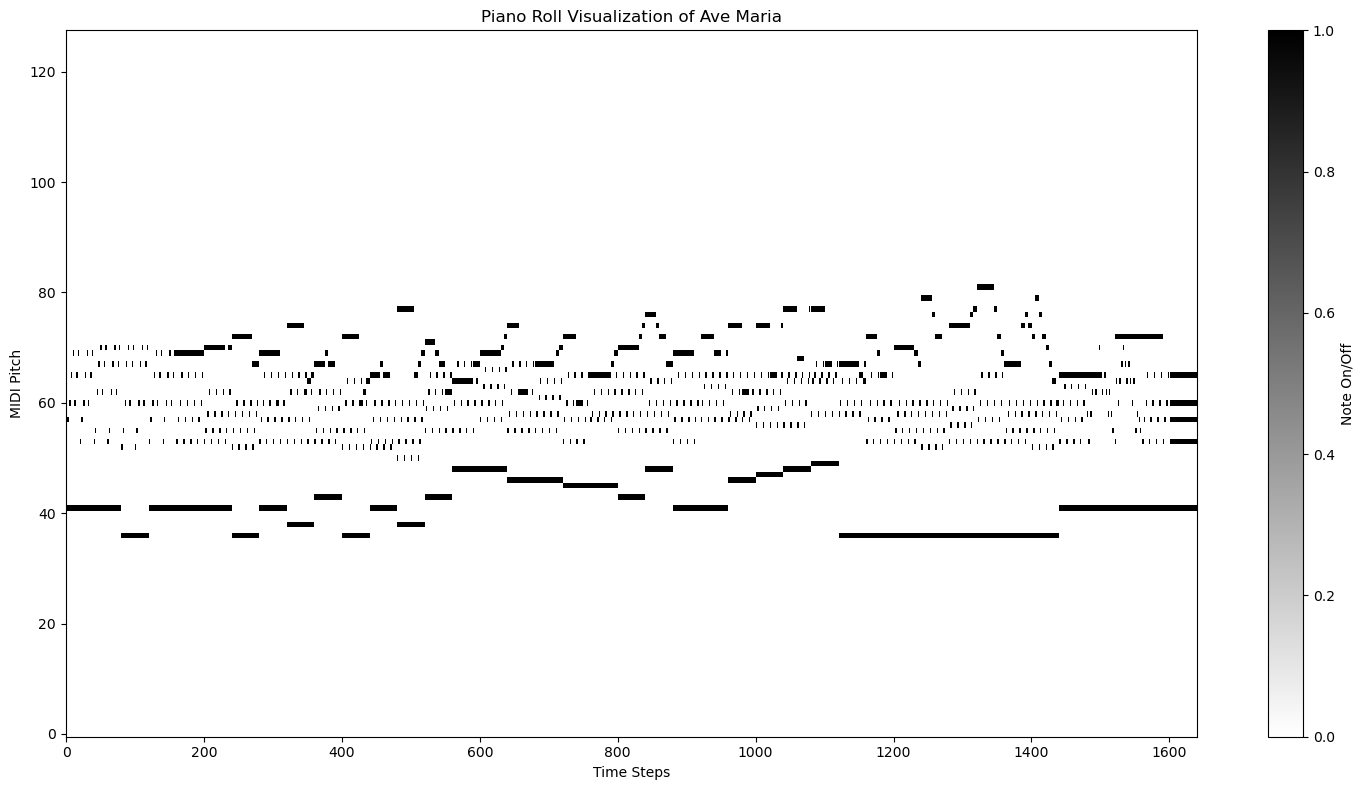

Piano roll shape: (128, 1641)
Total notes: 793


In [17]:
# Create a proper piano roll visualization
# First, get notes with their timing information
score = converter.parse(ave_maria_path)
notes_with_timing = []
for element in score.flat.notes:
    if isinstance(element, note.Note):
        notes_with_timing.append({
            'pitch': element.pitch.midi,
            'start': float(element.offset),
            'duration': float(element.duration.quarterLength)
        })
    elif isinstance(element, chord.Chord):
        for p in element.pitches:
            notes_with_timing.append({
                'pitch': p.midi,
                'start': float(element.offset),
                'duration': float(element.duration.quarterLength)
            })

# Create piano roll matrix
if notes_with_timing:
    max_time = max(n['start'] + n['duration'] for n in notes_with_timing)
    time_resolution = 0.1  # 10 time steps per quarter note
    time_steps = int(max_time / time_resolution) + 1
    
    # MIDI pitch range (typically 21-108 for piano, but we'll use 0-127)
    piano_roll = np.zeros((128, time_steps))
    
    for note_info in notes_with_timing:
        pitch = int(note_info['pitch'])
        start_step = int(note_info['start'] / time_resolution)
        duration_steps = int(note_info['duration'] / time_resolution)
        
        # Fill the piano roll
        for t in range(start_step, min(start_step + duration_steps, time_steps)):
            piano_roll[pitch, t] = 1
    
    # Visualize the piano roll
    plt.figure(figsize=(15, 8))
    plt.imshow(piano_roll, aspect='auto', cmap='gray_r', origin='lower', interpolation='nearest')
    plt.colorbar(label='Note On/Off')
    plt.title('Piano Roll Visualization of Ave Maria')
    plt.xlabel('Time Steps')
    plt.ylabel('MIDI Pitch')
    plt.tight_layout()
    plt.show()
    
    print(f"Piano roll shape: {piano_roll.shape}")
    print(f"Total notes: {len(notes_with_timing)}")
else:
    print("No notes found in the MIDI file")

In [18]:
base_dir = 'data/kaggle/midiclassics'
target_composers = ['Bach', 'Beethoven', 'Chopin', 'Mozart']

for composer in target_composers:
    composer_dir = os.path.join(base_dir, composer)
    flat_dir = os.path.join(base_dir, f"midi_{composer.lower()}_flat")
    os.makedirs(flat_dir, exist_ok=True)
    midi_files = []
    # Collect all MIDI file paths
    for root, dirs, files in os.walk(composer_dir):
        for file in files:
            if file.lower().endswith('.mid') or file.lower().endswith('.midi'):
                midi_files.append(os.path.join(root, file))
    # Move and rename files numerically
    for idx, src in enumerate(midi_files, 1):
        ext = os.path.splitext(src)[1]
        dst = os.path.join(flat_dir, f"{composer.lower()}_{idx}{ext}")
        shutil.move(src, dst)
    print(f"Flattened and renamed {len(midi_files)} {composer} files to {flat_dir}")

Flattened and renamed 1024 Bach files to data/kaggle/midiclassics/midi_bach_flat
Flattened and renamed 213 Beethoven files to data/kaggle/midiclassics/midi_beethoven_flat
Flattened and renamed 136 Chopin files to data/kaggle/midiclassics/midi_chopin_flat
Flattened and renamed 257 Mozart files to data/kaggle/midiclassics/midi_mozart_flat


1. Note Duration Distribution
Analyze the distribution of note durations per composer or per song.
Calculate mean, median, and variance of note durations.
2. Interval Analysis
Compute the intervals (distance in semitones) between consecutive notes.
Analyze interval frequency distributions for each composer.
3. Key and Mode Usage
Extract the key signature and mode (major/minor) for each piece.
Compare the frequency of different keys and modes by composer.
4. Tempo Analysis
Extract tempo (BPM) from each file.
Compare average and variance of tempo by composer.
5. Rhythmic Complexity
Measure syncopation, polyrhythms, or the diversity of rhythmic patterns.
6. Chord Progression Patterns
Analyze common chord progressions (e.g., II-V-I, I-IV-V) per composer.
7. Melodic Contour
Analyze the shape of melodies (e.g., ascending, descending, arch-shaped).
8. Polyphony/Texture
Count the number of simultaneous notes (chords vs. single notes).
Measure average polyphony per composer.
9. Motif or Theme Repetition
Detect repeated melodic or rhythmic motifs within and across pieces.
10. Pitch Range
Calculate the range (highest minus lowest pitch) used in each piece.
11. Mean energy, and plot energy per song

In [1]:
from music21 import converter
import os

base_dir = 'data/kaggle/midiclassics'
target_composers = ['Bach', 'Beethoven', 'Chopin', 'Mozart']

# Step 1: Parse all files once and store in a dictionary
scores_dict = {}
for composer in target_composers:
    flat_dir = os.path.join(base_dir, f"midi_{composer.lower()}_flat")
    midi_files = [os.path.join(flat_dir, f) for f in os.listdir(flat_dir) if f.lower().endswith('.mid') or f.lower().endswith('.midi')]
    for midi_path in midi_files:
        try:
            scores_dict[midi_path] = converter.parse(midi_path)
        except Exception as e:
            print(f"Error parsing {midi_path}: {e}")

# Step 2: Use scores_dict for all feature extraction
# Example: Access score for a file
# score = scores_dict[midi_path]

In [2]:
# show a few entries from the scores_dict
for i, (midi_path, score) in enumerate(scores_dict.items()):
    if i < 5:  # Show only the first 5 entries
        print(f"File: {midi_path}")
        print(f"Title: {score.metadata.title if score.metadata else 'Unknown'}")
        print(f"Composer: {score.metadata.composer if score.metadata else 'Unknown'}")
        print(f"Number of parts: {len(score.parts)}")
        print("-" * 40)
    else:
        break

File: data/kaggle/midiclassics/midi_bach_flat/bach_869.mid
Title: None
Composer: None
Number of parts: 2
----------------------------------------
File: data/kaggle/midiclassics/midi_bach_flat/bach_841.mid
Title: None
Composer: None
Number of parts: 4
----------------------------------------
File: data/kaggle/midiclassics/midi_bach_flat/bach_699.mid
Title: None
Composer: None
Number of parts: 4
----------------------------------------
File: data/kaggle/midiclassics/midi_bach_flat/bach_855.mid
Title: None
Composer: None
Number of parts: 3
----------------------------------------
File: data/kaggle/midiclassics/midi_bach_flat/bach_666.mid
Title: None
Composer: None
Number of parts: 4
----------------------------------------


memory concerns if using full songs

In [16]:
from music21 import note, chord
import matplotlib.pyplot as plt
import os
import numpy as np

# Extract note sequences with pitch and duration information
MAX_SEQUENCE_LENGTH = 10000

song_data = []
truncated_count = 0
total_notes_removed = 0

for midi_path, score in scores_dict.items():
    # Extract note sequences with pitch and duration
    note_sequences = []
    for element in score.flat.notes:
        if isinstance(element, note.Note):
            note_sequences.append({
                'pitch': element.pitch.midi,
                'duration': element.duration.quarterLength
            })
        elif isinstance(element, chord.Chord):
            # For chords, take the highest pitch (melody note)
            highest_pitch = max(p.midi for p in element.pitches)
            note_sequences.append({
                'pitch': highest_pitch,
                'duration': element.duration.quarterLength
            })
    
    # Extract composer from path
    composer = None
    for c in ['Bach', 'Beethoven', 'Chopin', 'Mozart']:
        if c.lower() in midi_path.lower():
            composer = c
            break
    
    if note_sequences and composer:
        # Apply truncation
        original_length = len(note_sequences)
        if original_length > MAX_SEQUENCE_LENGTH:
            note_sequences = note_sequences[:MAX_SEQUENCE_LENGTH]
            truncated_count += 1
            total_notes_removed += original_length - MAX_SEQUENCE_LENGTH
        
        song_data.append({
            'song': os.path.basename(midi_path),
            'composer': composer,
            'note_sequences': note_sequences,
            'sequence_length': len(note_sequences),
            'was_truncated': original_length > MAX_SEQUENCE_LENGTH,
            'original_length': original_length
        })

# Print statistics
print(f"Data extraction and truncation complete:")
print(f"Total songs: {len(song_data)}")
print(f"Songs truncated: {truncated_count} ({truncated_count/len(song_data)*100:.1f}%)")
print(f"Total notes removed: {total_notes_removed:,}")

# Show distribution by composer
composer_counts = {}
for entry in song_data:
    composer = entry['composer']
    composer_counts[composer] = composer_counts.get(composer, 0) + 1

print("\nSongs per composer:")
for composer, count in composer_counts.items():
    print(f"{composer}: {count} songs")

Data extraction and truncation complete:
Total songs: 1630
Songs truncated: 92 (5.6%)
Total notes removed: 466,979

Songs per composer:
Bach: 1024 songs
Beethoven: 213 songs
Chopin: 136 songs
Mozart: 257 songs


In [18]:
# Calculate actual durations after truncation
for entry in song_data:
    # Calculate the actual duration of the truncated sequence
    truncated_total_duration = sum(note['duration'] for note in entry['note_sequences'])
    entry['truncated_total_duration'] = truncated_total_duration

# Analysis of duration impact
print("Duration Analysis after Truncation:")
print(f"Average truncated duration: {np.mean([entry['truncated_total_duration'] for entry in song_data]):.2f} quarter notes")

# Show examples of truncation impact
truncated_songs = [entry for entry in song_data if entry['was_truncated']]
if truncated_songs:
    print(f"\nExamples of truncated songs:")
    for i, song in enumerate(truncated_songs[:3]):
        print(f"Song: {song['song']}")
        print(f"  Original notes: {song['original_length']}")
        print(f"  Truncated notes: {song['sequence_length']}")
        print(f"  Truncated duration: {song['truncated_total_duration']:.2f} quarter notes")

Duration Analysis after Truncation:
Average truncated duration: 1331.87 quarter notes

Examples of truncated songs:
Song: bach_844.mid
  Original notes: 31443
  Truncated notes: 10000
  Truncated duration: 8188.75 quarter notes
Song: bach_956.mid
  Original notes: 16136
  Truncated notes: 10000
  Truncated duration: 4771.50 quarter notes
Song: bach_981.mid
  Original notes: 11455
  Truncated notes: 10000
  Truncated duration: 7458.33 quarter notes


In [29]:
def create_piano_roll(note_sequences, time_resolution=0.1, fixed_time_steps=5000):
    piano_roll = np.zeros((128, fixed_time_steps))
    current_time = 0
    for note in note_sequences:
        pitch = int(note['pitch'])
        duration = note['duration']
        start_step = int(current_time / time_resolution)
        duration_steps = int(duration / time_resolution)
        end_step = min(start_step + duration_steps, fixed_time_steps)
        if start_step < fixed_time_steps:
            piano_roll[pitch, start_step:end_step] = 1
        current_time += duration
        if start_step >= fixed_time_steps:
            break
    return piano_roll

In [34]:
# Regenerate piano_roll_data with fixed shape for all songs
fixed_time_steps = 5000  # You can adjust this value as needed
piano_roll_data = []
for entry in song_data:
    piano_roll = create_piano_roll(entry['note_sequences'], time_resolution=0.1, fixed_time_steps=fixed_time_steps)
    piano_roll_data.append({
        'piano_roll': piano_roll,
        'composer': entry['composer'],
        'song': entry['song']
    })

Songs per composer:
Bach: 1024
Beethoven: 213
Chopin: 136
Mozart: 257


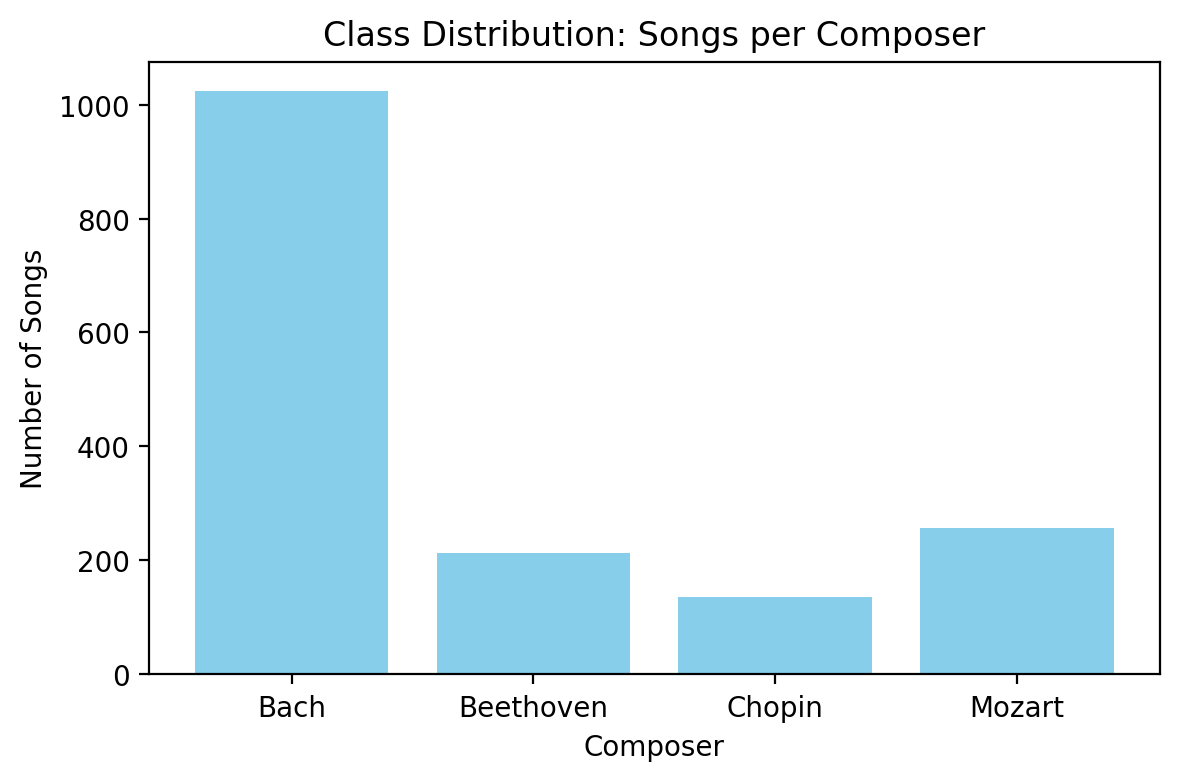

In [35]:
import matplotlib.pyplot as plt

# Count songs per composer
composer_counts = {}
for entry in piano_roll_data:
    composer = entry['composer']
    composer_counts[composer] = composer_counts.get(composer, 0) + 1

print("Songs per composer:")
for composer, count in composer_counts.items():
    print(f"{composer}: {count}")

# Plot class distribution
plt.figure(figsize=(6,4))
plt.bar(composer_counts.keys(), composer_counts.values(), color='skyblue')
plt.title("Class Distribution: Songs per Composer")
plt.xlabel("Composer")
plt.ylabel("Number of Songs")
plt.tight_layout()
plt.show()

Let's downsample first

In [36]:
import random

# Find minimum class size
min_count = min(composer_counts.values())

# Group songs by composer
composer_groups = {}
for entry in piano_roll_data:
    composer = entry['composer']
    composer_groups.setdefault(composer, []).append(entry)

# Downsample each group to min_count
balanced_data = []
for composer, songs in composer_groups.items():
    if len(songs) > min_count:
        balanced_data.extend(random.sample(songs, min_count))
    else:
        balanced_data.extend(songs)

# Shuffle the balanced dataset
random.shuffle(balanced_data)

# Show new class distribution
new_counts = {}
for entry in balanced_data:
    new_counts[entry['composer']] = new_counts.get(entry['composer'], 0) + 1

print("Balanced songs per composer:")
for composer, count in new_counts.items():
    print(f"{composer}: {count}")

Balanced songs per composer:
Chopin: 136
Bach: 136
Beethoven: 136
Mozart: 136


In [37]:
from sklearn.model_selection import train_test_split

# Extract labels
labels = [entry['composer'] for entry in balanced_data]

# Stratified split (e.g., 80% train, 20% test)
train_data, test_data = train_test_split(
    balanced_data, test_size=0.2, stratify=labels, random_state=42
)

print(f"Train set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

# Optional: Show class distribution in each set
from collections import Counter
print("Train class distribution:", Counter([e['composer'] for e in train_data]))
print("Test class distribution:", Counter([e['composer'] for e in test_data]))

Train set size: 435
Test set size: 109
Train class distribution: Counter({'Mozart': 109, 'Bach': 109, 'Beethoven': 109, 'Chopin': 108})
Test class distribution: Counter({'Chopin': 28, 'Bach': 27, 'Mozart': 27, 'Beethoven': 27})


In [38]:
import torch
from torch.utils.data import Dataset, DataLoader

# Step 1: Define a custom Dataset
class PianoRollDataset(Dataset):
    def __init__(self, data, composer_to_idx=None):
        self.data = data
        # Map composer names to integer labels
        if composer_to_idx is None:
            composers = sorted(set(entry['composer'] for entry in data))
            self.composer_to_idx = {c: i for i, c in enumerate(composers)}
        else:
            self.composer_to_idx = composer_to_idx

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        entry = self.data[idx]
        piano_roll = torch.tensor(entry['piano_roll'], dtype=torch.float32)
        label = self.composer_to_idx[entry['composer']]
        return piano_roll, label

# Step 2: Create datasets
composer_to_idx = {c: i for i, c in enumerate(sorted(set(entry['composer'] for entry in balanced_data)))}
train_dataset = PianoRollDataset(train_data, composer_to_idx)
test_dataset = PianoRollDataset(test_data, composer_to_idx)

# Step 3: Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Example: get a batch
for piano_rolls, labels in train_loader:
    print("Batch piano roll shape:", piano_rolls.shape)
    print("Batch labels:", labels)
    break

Batch piano roll shape: torch.Size([16, 128, 5000])
Batch labels: tensor([2, 1, 1, 0, 1, 2, 0, 0, 3, 3, 0, 3, 2, 3, 3, 1])


In [50]:
composer_to_idx

{'Bach': 0, 'Beethoven': 1, 'Chopin': 2, 'Mozart': 3}

In [41]:
import torch.nn as nn

class PianoRollCNN_LSTM(nn.Module):
    def __init__(self, num_classes=4, lstm_hidden=128):
        super().__init__()
        # CNN layers (same as before)
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(8)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(16)
        self.pool2 = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(32)
        self.pool3 = nn.MaxPool2d(2)
        self.conv4 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.pool4 = nn.MaxPool2d(2)
        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.pool5 = nn.MaxPool2d(2)
        # After CNN: (batch, 128, H, W)
        self.flatten_spatial = nn.Flatten(2)  # keep batch and channel, flatten H*W
        # LSTM expects (batch, seq_len, features)
        self.lstm = nn.LSTM(input_size=128, hidden_size=lstm_hidden, batch_first=True)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(lstm_hidden, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # (batch, 1, 128, 5000)
        x = self.pool1(nn.ReLU()(self.bn1(self.conv1(x))))
        x = self.pool2(nn.ReLU()(self.bn2(self.conv2(x))))
        x = self.pool3(nn.ReLU()(self.bn3(self.conv3(x))))
        x = self.pool4(nn.ReLU()(self.bn4(self.conv4(x))))
        x = self.pool5(nn.ReLU()(self.bn5(self.conv5(x))))
        # x shape: (batch, 128, H, W)
        x = self.flatten_spatial(x)  # (batch, 128, H*W)
        x = x.permute(0, 2, 1)      # (batch, seq_len, features)
        lstm_out, _ = self.lstm(x)  # (batch, seq_len, lstm_hidden)
        out = lstm_out[:, -1, :]    # use last time step
        out = self.dropout(out)
        out = self.fc(out)
        return out

In [44]:
num_classes = len(composer_to_idx)
model = PianoRollCNN_LSTM(num_classes=num_classes, lstm_hidden=128).to(device)

In [54]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [55]:
def train_model(model, train_loader, criterion, optimizer, device, num_epochs=20):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for piano_rolls, labels in train_loader:
            piano_rolls, labels = piano_rolls.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(piano_rolls)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")


In [56]:

def evaluate_model(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for piano_rolls, labels in test_loader:
            piano_rolls, labels = piano_rolls.to(device), labels.to(device)
            outputs = model(piano_rolls)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

In [ ]:
# Train the model
train_model(model, train_loader, criterion, optimizer, device, num_epochs=20)

# Evaluate the model
evaluate_model(model, test_loader, device)

Epoch 1/10, Loss: 1.3973
Epoch 2/10, Loss: 1.3956
Epoch 3/10, Loss: 1.3920
Epoch 4/10, Loss: 1.3930
Epoch 5/10, Loss: 1.3899
Epoch 6/10, Loss: 1.3930
Epoch 7/10, Loss: 1.3929
Epoch 8/10, Loss: 1.3894
Epoch 9/10, Loss: 1.3885
Epoch 10/10, Loss: 1.3897
Test Accuracy: 24.77%


24.770642201834864